In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.ticker as mticker

## Logistic Regression Exercise

**Part 1: Load and explore**

1. Load the dataset and display the first few rows.  

In [2]:
# Read in csv file
movies = pd.read_csv('../data/movies.csv')

2. How many movies in the dataset were nominated for Best Picture?  

In [3]:
# Check columns
movies.columns

Index(['Title', 'Year', 'Vote_Average', 'Vote_Count', 'Budget', 'Revenue',
       'TMDB_ID', 'Nominee', 'Winner', 'Genre_Action', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_History',
       'Genre_Horror', 'Genre_Music', 'Genre_Mystery', 'Genre_Romance',
       'Genre_Science Fiction', 'Genre_TV Movie', 'Genre_Thriller',
       'Genre_War', 'Genre_Western'],
      dtype='object')

In [4]:
# Locate number of nominated movies
movies['Nominee'].value_counts().loc[1]

np.int64(91)

3. What percentage of movies were nominated?  

In [5]:
# View shappe of dataframe to compute statistic
movies.shape

(1005, 28)

In [6]:
# Calculate statistic
print(f'{91 / 1005:.2f}% of movies in this dataset are best picture nominees')

0.09% of movies in this dataset are best picture nominees


4. Compute the average revenue for:  
    * nominated movies  
    * non-nominated movies  
Does revenue look associated with nominations?

In [7]:
# Create seperate dataframes
nominee = movies[movies['Nominee'] == True]
non_nominee = movies[movies['Nominee'] == False]

In [8]:
# Calulate average revenue
nominee['Revenue'].mean(), non_nominee['Revenue'].mean()

(np.float64(232573777.25274727), np.float64(189624332.38402626))

**Part 2: Logistic Regression: Revenue Only**

5. Fit a logistic regression model for whether a movie was nominated based on its revenue.  

In [9]:
# Fit Logistic regression model
mov_nom_rev_logreg = smf.logit("Nominee ~ Revenue",
                          data = movies).fit()

Optimization terminated successfully.
         Current function value: 0.303106
         Iterations 6


In [10]:
# Interpret coefficients
mov_nom_rev_logreg.params

Intercept   -2.385659e+00
Revenue      3.752031e-10
dtype: float64

6. Interpret the sign of the coefficient for Revenue.  

Revenue has a very slight effect at increasing likelyhood of being nominated.

7. Use the model to estimate the probability of nomination for a movie with 10M revenue, 100M revenue, and 500M revenue.  

In [11]:
# Define formula
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [12]:
# Build tool to calculate probabilities 
revenue = 500_000_000

logit_p = mov_nom_rev_logreg.params['Intercept'] + mov_nom_rev_logreg.params['Revenue']*revenue

print(f'Estimated Probability of Nomination with $500M revenue: {logistic(logit_p)}')

Estimated Probability of Nomination with $500M revenue: 0.09992508312035361


In [29]:
# dataframe with all predictions
pred_df = pd.DataFrame({
'Revenue': [10000000, 100000000, 500000000]
})
mov_nom_rev_logreg.predict(pred_df)

0    0.084563
1    0.087214
2    0.099925
dtype: float64

>* Estimated probability of nomination with **10M** dollar revenue: 0.08456283924639596
>* Estimated probability of nomination with **100M** dollar revenue: 0.08721384640957922
>* Estimated probability of nomination with **500M** dollar revenue: 0.09992508312035361

8. Make a plot of predicted probability vs. revenue.

In [25]:
formatter = mticker.StrMethodFormatter('${x:,.0f}')

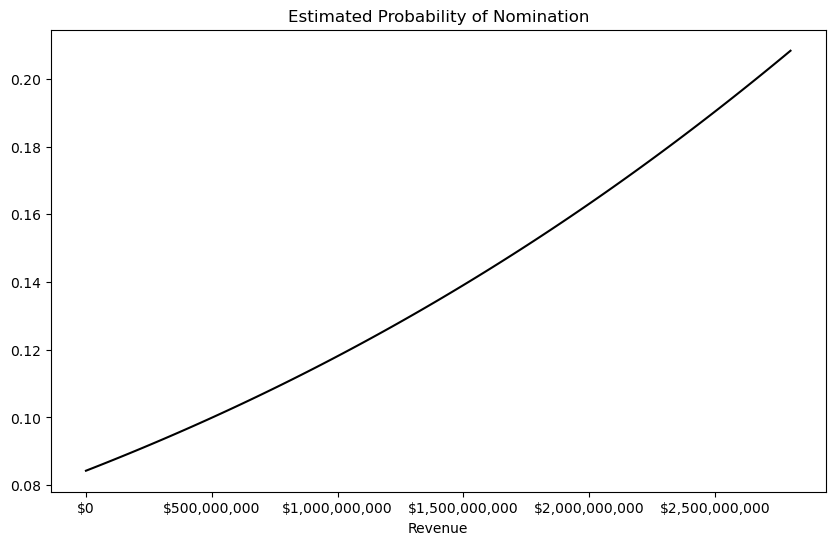

In [27]:
fit_df = pd.DataFrame({
    'Revenue': np.linspace(start = movies['Revenue'].min(),
                            stop = movies['Revenue'].max(),
                            num = 100)
})

fit_df['fit'] = mov_nom_rev_logreg.predict(fit_df)

ax = fit_df.plot(x = 'Revenue',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of Nomination');

ax.xaxis.set_major_formatter(formatter)

**Part 3: Add Genre**

9. Fit a model for whether a movie was nominated based on its revenue and whether or not it is a drama.  

In [14]:
# Fit logistic regression with additional variable
genre_logreg = smf.logit("Nominee ~ Revenue + Genre_Drama",
                         data = movies).fit()

Optimization terminated successfully.
         Current function value: 0.234564
         Iterations 8


In [15]:
# Show coefficients
genre_logreg.params

Intercept             -4.783568e+00
Genre_Drama[T.True]    3.340881e+00
Revenue                1.727152e-09
dtype: float64

10. Interpret the coefficient for Genre_Drama. 

> This coefficient shows that Drama as a genre has a significant effect on the likleyhood of being nominated.

11. Using your final model, compute the predicted probabilities of nominations for:  
    * 20M dollar non-drama
    * 20M dollar drama
    * 300M dollar non-drama
    * 300M dollar drama  

In [31]:
# Build tool to calculate logistic regression probabilities
revenue = 300_000_000

logit_p = genre_logreg.params['Intercept'] + genre_logreg.params['Revenue'] * revenue + (genre_logreg.params['Genre_Drama[T.True]']*0)

print(f'Estimated probability of nomination with 300 million dollars in revenue and not drama: {logistic(logit_p):.4f}')

Estimated probability of nomination with 300 million dollars in revenue and not drama: 0.0139


>* Estimated probability of nomination with 20 million dollars revenue and not drama: 0.86%
>* Estimated probability of nomination with 20 million dollars in revenue and drama genre: 19.65%
>* Estimated probability of nomination with 300 million dollars in revenue and not drama: 1.39%
>* Estimated probability of nomination with 300 million dollars in revenue and drama genre: 28.40%

12. Which variable has the larger effect: being a drama or revenue?

> Being a Drama has a larger effect on nomination than revenue.

**Part 4: Stretch Questions**  

13. How do the empirical and estimated probabilities look for the revenue-only model? What about the model that uses both revenue and the drama genre?    
14. Revenue is highly skewed, which means that log revenue might make for a better model fit. Try fitting a model using log revenue. Then compare these models. You can look at [Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [log-likelihood](https://en.wikipedia.org/wiki/Likelihood_function). You might also look at a [calibration curve](https://encord.com/glossary/calibration-curve/).  
15. Add other genres to your model. Which genres have the largest effect on the estimated probability of being nominated?  
16. Instead of revenue, use profit. How does this change the model?